<a href="https://colab.research.google.com/github/z-arabi/Machine-Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/z-arabi/Machine-Learning.git
%cd Machine-Learning

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 67 (delta 26), reused 10 (delta 1), pack-reused 0
Unpacking objects: 100% (67/67), done.
/content/Machine-Learning


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [4]:
df = pd.read_csv('Datasets/Social_Network_Ads.csv')

df.drop('User ID', axis=1, inplace=True)
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [25]:
df.Gender = pd.get_dummies(df.Gender, drop_first=True)
X = df.to_numpy()

np.random.seed = 0
X = X[np.random.permutation(X.shape[0])]

y = X[:, -1]
X = X[:, :-1]

In [26]:
X = (X-X.mean(axis=0)) / X.std(axis=0)

In [27]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

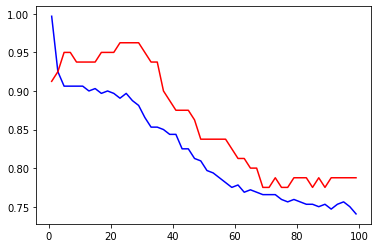

In [28]:
# from sklearn.neighbors import KNeighborsClassifier KNeighborsRegressor
# weights > uniform / distance
# algorithm > to accelerate the time of calcualting k nearest neighbor to be better than O(n) > there might be fall in score > 
# brute-force > compare with all of the data > deafult: auto
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(np.arange(1, 100, 2), np.array(train_scores), 'b-')
plt.plot(np.arange(1, 100, 2), np.array(test_scores), 'r-')

In [30]:
print(np.array(test_scores).max())
print(np.array(test_scores).argmax()) 
#  k=11 is best k in this problem
# knn does the normalization itself > because it is too senitive to the scale of the data

0.9625
11


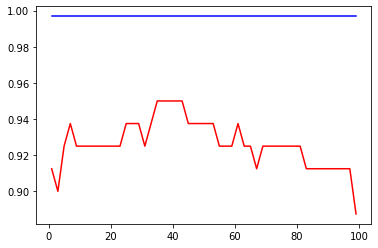

In [32]:
train_scores = []
test_scores = []
for k in range(1, 100, 2):
    clf = KNeighborsClassifier(n_neighbors=k, weights="distance")
    clf.fit(X_train, y_train)
    
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.plot(np.arange(1, 100, 2), np.array(train_scores), 'b-')
plt.plot(np.arange(1, 100, 2), np.array(test_scores), 'r-')

# for the distance metric the train data always overlap on themselves > it has the acc=1

In [33]:
print(np.array(test_scores).max())
print(np.array(test_scores).argmax()) 

0.95
17
